In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/Prasa/Desktop/New folder/train.csv")

In [4]:
df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x = df.drop("label", axis = 1)

In [7]:
y = df["label"]

In [9]:
x.shape

(42000, 784)

In [10]:
y.shape

(42000,)

C:\Users\Prasa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


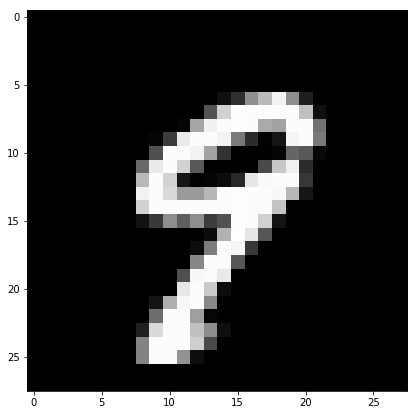

9


In [20]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 11

grid_data = x.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(y[11])

In [21]:
labels = y.head(15000)
data = x.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [22]:

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\Prasa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(15000, 784)


C:\Users\Prasa\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
sample_data = standardized_data

In [85]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [86]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


In [87]:
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_eigen_vector", "2nd_eigen_vector", "label"))



In [79]:
pca_df.shape

(15000, 3)

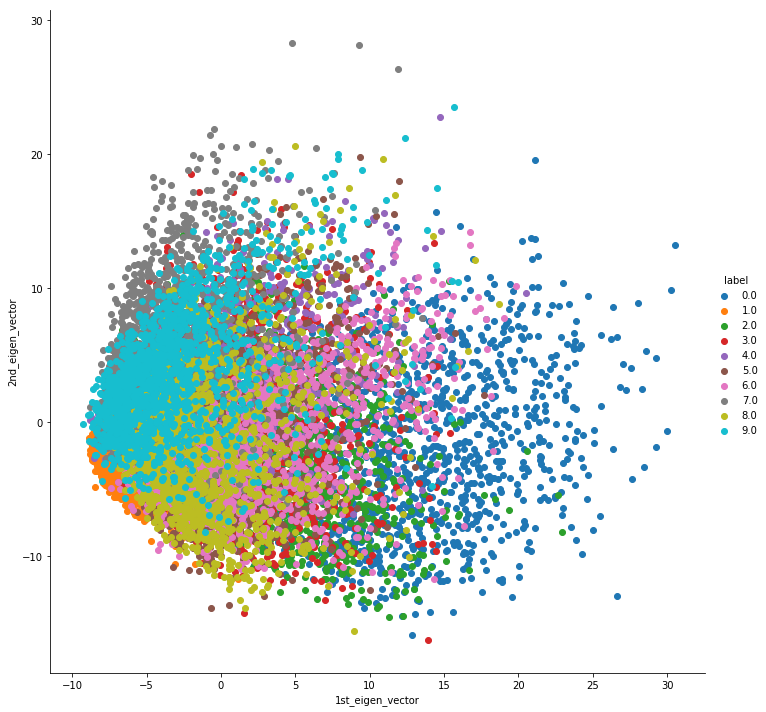

In [108]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_eigen_vector", "2nd_eigen_vector", "label"))
sns.FacetGrid(pca_df, hue="label", height=10).map(plt.scatter, '1st_eigen_vector', '2nd_eigen_vector').add_legend()
plt.show()